In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.precision',3)
import helperfunction as hf
%matplotlib inline

In [26]:
file = 'https://raw.githubusercontent.com/learn-co-students/dc_ds_06_03_19/master/module_1/week_3_project/data/bom.movie_gross.csv.gz'
bom = pd.read_csv(file)

In [4]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,4.150e+08,652000000,2010
1,Alice in Wonderland (2010),BV,3.342e+08,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,2.960e+08,664300000,2010
3,Inception,WB,2.926e+08,535700000,2010
4,Shrek Forever After,P/DW,2.387e+08,513900000,2010


In [6]:
# import the movie budget pickle file 
profit = pd.read_pickle('data/movie_profit_info.pkl')
profit.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic profit %,world profit %
0,2009-12-18,Avatar,425000000,760507625,2776345279,78.943,553.258
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-41.290,154.667
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-87.782,-57.211
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,38.840,324.384
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,95.641,315.370


In [10]:
hf.rename_columns(profit, {'movie': 'title'})

In [8]:
profit['year'] = profit.release_date.dt.year

In [9]:
profit.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic profit %,world profit %,year
0,2009-12-18,Avatar,425000000,760507625,2776345279,78.943,553.258,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-41.290,154.667,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-87.782,-57.211,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,38.840,324.384,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,95.641,315.370,2017


In [27]:
profit_bom = hf.merge_tables(profit, bom, ['title','year'], 'inner')

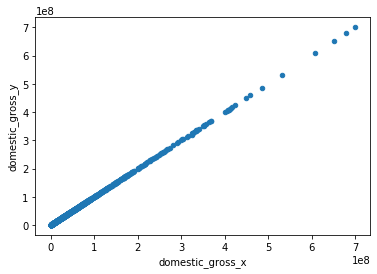

In [28]:
profit_bom.plot.scatter(x = 'domestic_gross_x', y = 'domestic_gross_y')

In [32]:
hf.stringtonum(profit_bom, ['foreign_gross'], ',')
profit_bom['foreign_gross']

0       8.046e+08
1       9.464e+08
2       1.370e+03
3       4.289e+08
4       6.806e+08
5       6.368e+08
6       1.792e+08
7       1.712e+08
8       2.111e+08
9       3.910e+08
10      7.452e+08
11      5.433e+08
12      7.181e+08
13      7.000e+08
14      7.009e+08
15      1.010e+03
16      6.223e+08
17      3.770e+08
18      4.959e+08
19      2.376e+08
20      4.753e+08
21      1.019e+03
22      8.586e+08
23      2.164e+08
24      6.469e+08
25      6.342e+08
26      5.239e+08
27      5.423e+08
28      6.520e+08
29      8.058e+08
          ...    
1185          NaN
1186          NaN
1187    5.480e+05
1188    6.820e+05
1189          NaN
1190    6.690e+05
1191          NaN
1192          NaN
1193          NaN
1194          NaN
1195    1.300e+06
1196          NaN
1197          NaN
1198    1.430e+05
1199          NaN
1200          NaN
1201    1.900e+06
1202          NaN
1203    4.580e+04
1204    4.000e+06
1205          NaN
1206          NaN
1207    3.360e+05
1208          NaN
1209    4.

In [34]:
profit_bom['foreign_gross_x'] = profit_bom['worldwide_gross'] - profit_bom['domestic_gross_x']

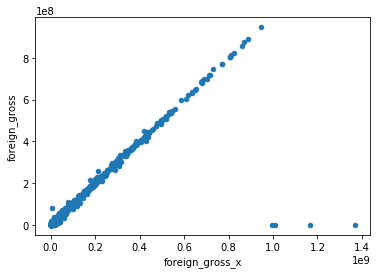

In [35]:
profit_bom.plot.scatter(x = 'foreign_gross_x', y = 'foreign_gross')

In [15]:
profit_bom.head()  # correct info 

,release_date,title,production_budget,domestic_gross_x,worldwide_gross,domestic profit %,world profit %,year,studio,domestic_gross_y,foreign_gross
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-41.290,154.667,2011,BV,2.411e+08,804600000
1,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,38.840,324.384,2015,BV,4.590e+08,946400000
2,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,126.272,582.711,2018,BV,6.788e+08,"1,369.5"
3,2017-11-17,Justice League,300000000,229024295,655945209,-23.659,118.648,2017,WB,2.290e+08,428900000
4,2015-11-06,Spectre,300000000,200074175,879620923,-33.309,193.207,2015,Sony,2.001e+08,680600000


In [108]:
# we used BOM to confirm and decided to go with the budget data: movie_profit_info.pkl

(4900, 6)